# 딥러닝 활용 맛보기

## 딥러닝 활용 예제 살펴보기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist



### 데이터 모양 살펴보기

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train:%s y_train:%s x_test:%s y_test:%s" %(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train:(60000, 28, 28) y_train:(60000,) x_test:(10000, 28, 28) y_test:(10000,)


### 학습 데이터 그림 그려보기 1

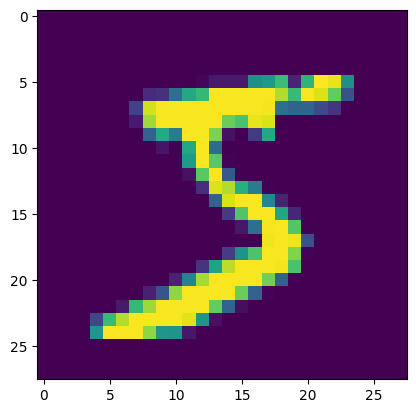

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.show()

#### 그림 픽셀 값 출력해 보기

In [6]:
for y in range(28):
    for x in range(28):
        print("%4s"%x_train[0][y][x], end=' ')
    print()

   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
   0    0    0    0    0    0    0    0    0    0    0    0    3   18   18   18  126  136  175   26  166  255  247  127    0    0    0    0 
   0    0    0    0    0    0    0    0   30   36   94  154  170  253  253  253  253  253  225  172  253  242  195   64    0    0    0    0 
   0    0    

### 학습 데이터 그림 그려보기 2

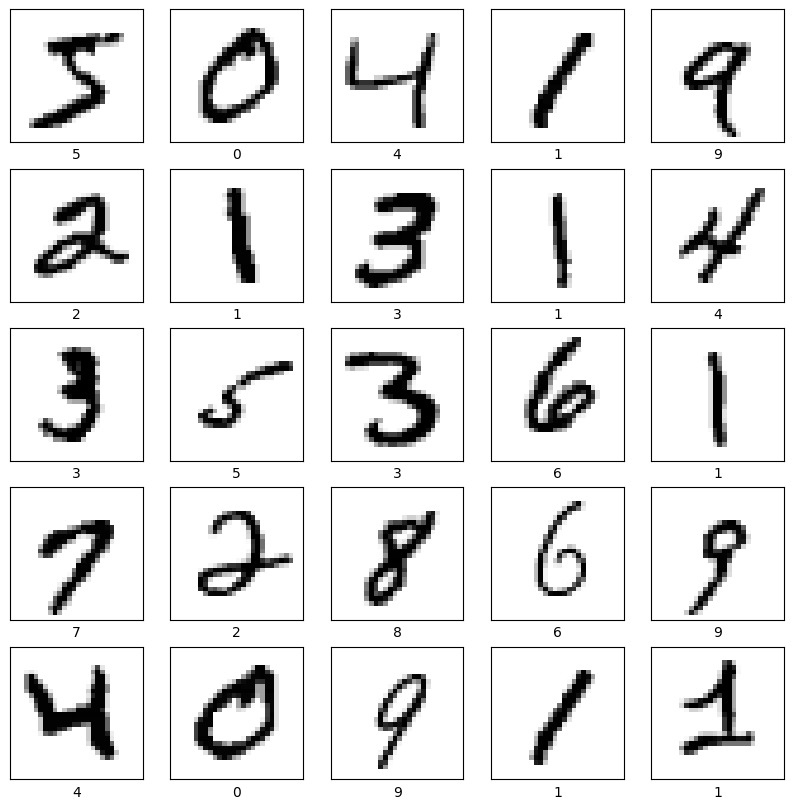

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
    
plt.show()

## 인공 신경망 학습시키기

In [17]:
x_train, x_test = x_train / 255.0, x_test/255.0
x_train, x_test = x_train.reshape((60000, 784)), x_test.reshape((10000, 784))

model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape = (784,)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax'),
])

model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1000)
model.evaluate(x_test, y_test)

Epoch 1/1000


c:\Users\kahn\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step - accuracy: 0.5953 - loss: 1.6347
Epoch 2/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.8664 - loss: 0.5149
Epoch 3/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.8939 - loss: 0.3863
Epoch 4/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.9037 - loss: 0.3391
Epoch 5/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.9102 - loss: 0.3138
Epoch 6/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.9147 - loss: 0.2962
Epoch 7/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.9184 - loss: 0.2810
Epoch 8/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.9198 - loss: 0.2750
Epoch 9/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.9232 - loss: 0.2615
Epoch 10/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.9275 - loss: 0.2505
Epoch 11/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.9308 - loss: 0.2391

[0.2493157684803009, 0.9764999747276306]

### 학습된 인공 신경망 시험하기

In [18]:
p_test = model.predict(x_test)
print('p_test[0] : ' , p_test[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
p_test[0] :  [3.9497441e-28 0.0000000e+00 4.8958052e-23 7.7410320e-16 0.0000000e+00
 1.1016390e-36 0.0000000e+00 1.0000000e+00 8.8080663e-28 2.2494949e-18]


## 예측 값과 실제 값 출력해 보기

In [19]:
import numpy as np

print('p_test[0] :' , np.argmax(p_test[0]), 'y_test[0] :' , y_test[0])

p_test[0] : 7 y_test[0] : 7


### 시험 데이터 그림 그려보기

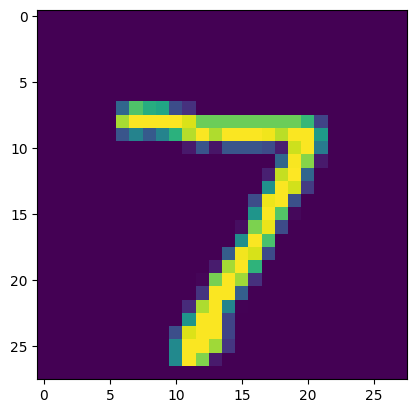

In [20]:
x_test = x_test.reshape(10000, 28,28)

plt.figure()
plt.imshow(x_test[0])
plt.show()

### 시험 데이터 그림 그려보기2

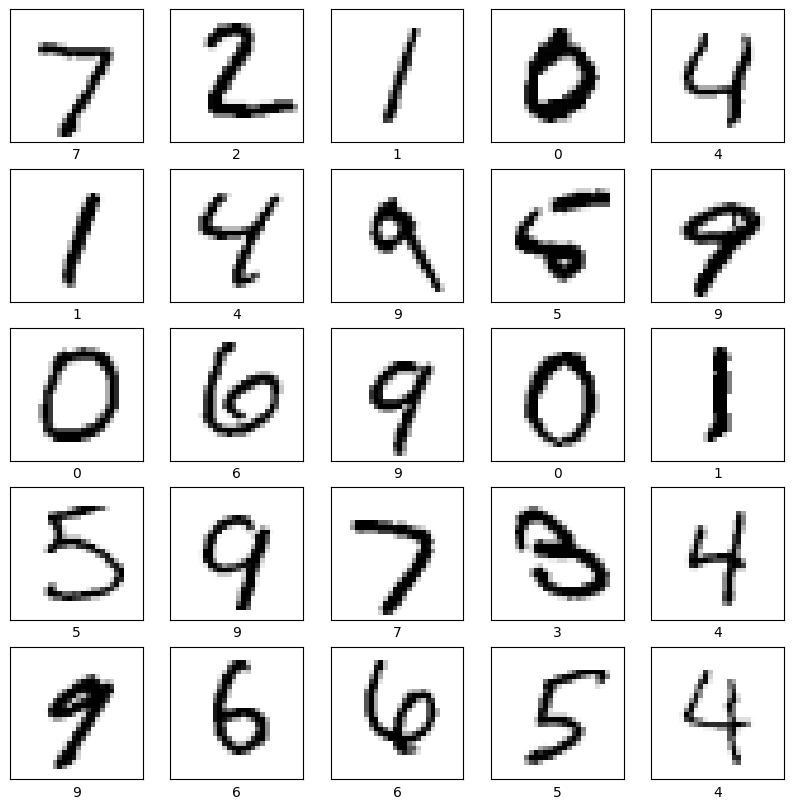

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(p_test[i]))
    
plt.show()

## 잘못된 예측 살펴보기

In [22]:
cnt_wrong = 0

p_wrong =[]
for i in range(10000):
    if np.argmax(p_test[i]) != y_test[i]:
        p_wrong.append(i)
        cnt_wrong +=1
        
print('cnt_wrong : ' , cnt_wrong)
print('predicted wrong 10 :' , p_wrong[:10])

cnt_wrong :  235
predicted wrong 10 : [149, 241, 247, 321, 340, 381, 445, 578, 582, 610]


#### 잘못 예측한 그림 살펴보기

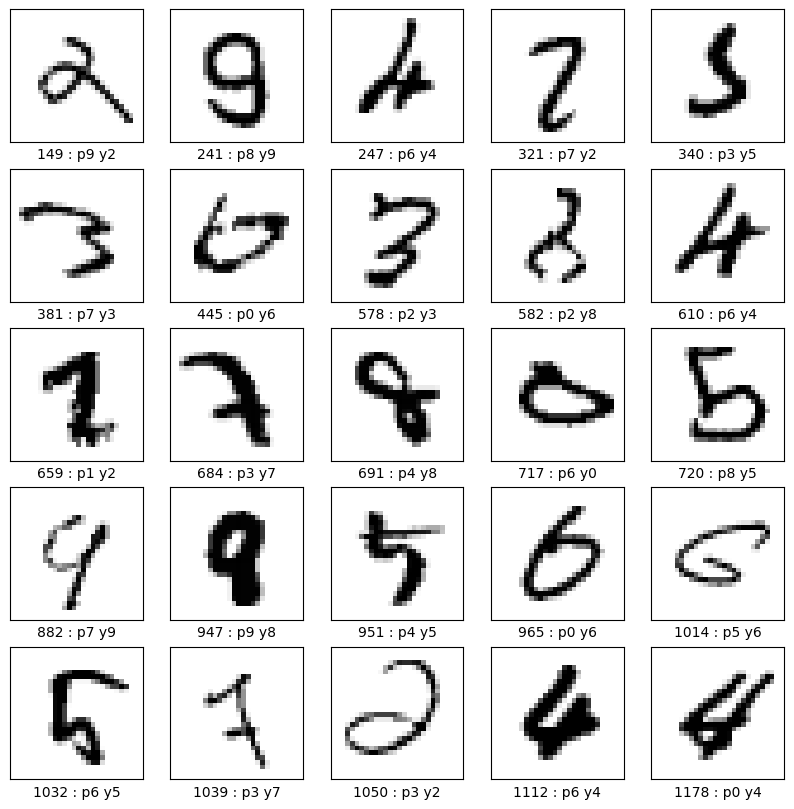

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[p_wrong[i]], cmap=plt.cm.binary)
    plt.xlabel("%s : p%s y%s" %(
        p_wrong[i], np.argmax(p_test[p_wrong[i]]), y_test[p_wrong[i]]))
    
plt.show()